In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import json
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
cid = 'XXXXXXX'
secret =  'YYYYYYYY'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
# Train
with open('/Users/radhikajangi/Desktop/ML/Homework/finalproject/spotify_million_playlist_dataset/data/mpd.slice.0-999.json') as f:
    data = json.load(f)

In [4]:
# Dev
with open('/Users/radhikajangi/Desktop/ML/Homework/finalproject/spotify_million_playlist_dataset/data/mpd.slice.52000-52999.json') as f:
    data = json.load(f)

In [16]:
# Songbank
with open('/Users/radhikajangi/Desktop/ML/Homework/finalproject/spotify_million_playlist_dataset/data/mpd.slice.84000-84999.json') as f:
    data = json.load(f)

In [17]:
details, playlists = data.items()

In [6]:
type(playlists)

tuple

In [99]:
# playlists = tuple (playlists, actual playlists)
# playlists[1] = list of playlists
train_pl = playlists[1][0:100]

In [7]:
dev_pl = playlists[1][0:20]

In [27]:
sb = playlists[1][0:50]

In [9]:
def create_train(playlists):
    
    data = []

    for j in range(len(playlists)):
        playid  = '_'.join([playlists[j]['name'],str(playlists[j]['pid'])])
        for i in range(len(playlists[j]['tracks'])):
            dat = sp.audio_features((playlists[j]['tracks'][i]['track_uri']))[0]
            dat.update({'playlist_pid':playid})
            data.append(dat)
    df = pd.DataFrame(data)
    df.set_index('uri', inplace=True)
    df.drop(['type', 'track_href', 'analysis_url'], axis=1, inplace=True)
    return(df)


In [42]:
def create_sb(playlists):
    
    data = []
    randrange = random.sample(range(len(playlists)),50)
    for j in randrange:
        playid  = '_'.join([playlists[j]['name'],str(playlists[j]['pid'])])
        dat = sp.audio_features((playlists[j]['tracks'][random.sample(range(len(playlists[j]['tracks'])),1)[0]]['track_uri']))[0]
        dat.update({'playlist_pid':playid})
        data.append(dat)
    df = pd.DataFrame(data)
    df.set_index('uri', inplace=True)
    df.drop(['type', 'track_href', 'analysis_url', 'id'], axis=1, inplace=True)
    return(df)

In [10]:
dat = create_train(small_pl)
dat

In [30]:
dat = create_train(dev_pl)
dat

In [48]:
dat = create_sb(sb)
dat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_pid
uri,,,,,,,,,,,,,,
spotify:track:1yoO94wPL8khknS04ltxkn,0.804,0.6320,11,-8.584,1,0.0443,0.067900,0.030000,0.1590,0.688,124.973,195213,4,Lounge House_84015
spotify:track:0JXXNGljqupsJaZsgSbMZV,0.684,0.6070,11,-8.127,0,0.1000,0.026700,0.000307,0.1910,0.498,81.001,195373,4,yasssss_84048
spotify:track:152lZdxL1OR0ZMW6KquMif,0.736,0.4490,1,-11.462,0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080,4,¯\_(ツ)_/¯_84032
spotify:track:0bsMTtWnxQ4lKlfBreueZt,0.394,0.4430,1,-5.928,1,0.0414,0.200000,0.000007,0.2680,0.312,103.051,190822,4,13.1_84046
spotify:track:7aAEJfIzJUUSRXQNz2JzfO,0.516,0.7080,9,-4.465,0,0.0253,0.049400,0.000005,0.2430,0.330,89.938,289067,3,lucid_84019
spotify:track:6aVJCjQ2cg0yeFRLD6c9vD,0.466,0.8280,7,-4.974,1,0.0422,0.137000,0.000000,0.1400,0.595,160.043,240840,4,Centuries_84016
spotify:track:41XCLKG0xl01mGprBDtTNS,0.722,0.7780,7,-5.826,1,0.2250,0.060300,0.000000,0.2820,0.779,96.008,170933,4,Christmas!_84013
spotify:track:3Y3JVKIKq9VQEKQolgz67k,0.555,0.7690,8,-3.959,0,0.0314,0.114000,0.000001,0.1470,0.541,85.982,315853,4,punjabi songs_84047
spotify:track:4KAs4IcxluXDFGuV4XCEJa,0.710,0.7300,9,-8.381,0,0.0481,0.293000,0.105000,0.0980,0.729,98.015,250587,4,February 2017_84040


In [49]:
dat['avg_duration'] = dat.groupby(['playlist_pid'])['duration_ms'].transform('mean')
dat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_pid,avg_duration
uri,,,,,,,,,,,,,,,
spotify:track:1yoO94wPL8khknS04ltxkn,0.804,0.6320,11,-8.584,1,0.0443,0.067900,0.030000,0.1590,0.688,124.973,195213,4,Lounge House_84015,195213.0
spotify:track:0JXXNGljqupsJaZsgSbMZV,0.684,0.6070,11,-8.127,0,0.1000,0.026700,0.000307,0.1910,0.498,81.001,195373,4,yasssss_84048,195373.0
spotify:track:152lZdxL1OR0ZMW6KquMif,0.736,0.4490,1,-11.462,0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080,4,¯\_(ツ)_/¯_84032,219080.0
spotify:track:0bsMTtWnxQ4lKlfBreueZt,0.394,0.4430,1,-5.928,1,0.0414,0.200000,0.000007,0.2680,0.312,103.051,190822,4,13.1_84046,190822.0
spotify:track:7aAEJfIzJUUSRXQNz2JzfO,0.516,0.7080,9,-4.465,0,0.0253,0.049400,0.000005,0.2430,0.330,89.938,289067,3,lucid_84019,289067.0
spotify:track:6aVJCjQ2cg0yeFRLD6c9vD,0.466,0.8280,7,-4.974,1,0.0422,0.137000,0.000000,0.1400,0.595,160.043,240840,4,Centuries_84016,240840.0
spotify:track:41XCLKG0xl01mGprBDtTNS,0.722,0.7780,7,-5.826,1,0.2250,0.060300,0.000000,0.2820,0.779,96.008,170933,4,Christmas!_84013,170933.0
spotify:track:3Y3JVKIKq9VQEKQolgz67k,0.555,0.7690,8,-3.959,0,0.0314,0.114000,0.000001,0.1470,0.541,85.982,315853,4,punjabi songs_84047,315853.0
spotify:track:4KAs4IcxluXDFGuV4XCEJa,0.710,0.7300,9,-8.381,0,0.0481,0.293000,0.105000,0.0980,0.729,98.015,250587,4,February 2017_84040,250587.0


In [50]:
dat['mode_key'] = dat.groupby(['playlist_pid'])['key'].transform(lambda x: x.value_counts().index[0])
dat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_pid,avg_duration,mode_key
uri,,,,,,,,,,,,,,,,
spotify:track:1yoO94wPL8khknS04ltxkn,0.804,0.6320,11,-8.584,1,0.0443,0.067900,0.030000,0.1590,0.688,124.973,195213,4,Lounge House_84015,195213.0,11
spotify:track:0JXXNGljqupsJaZsgSbMZV,0.684,0.6070,11,-8.127,0,0.1000,0.026700,0.000307,0.1910,0.498,81.001,195373,4,yasssss_84048,195373.0,11
spotify:track:152lZdxL1OR0ZMW6KquMif,0.736,0.4490,1,-11.462,0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080,4,¯\_(ツ)_/¯_84032,219080.0,1
spotify:track:0bsMTtWnxQ4lKlfBreueZt,0.394,0.4430,1,-5.928,1,0.0414,0.200000,0.000007,0.2680,0.312,103.051,190822,4,13.1_84046,190822.0,1
spotify:track:7aAEJfIzJUUSRXQNz2JzfO,0.516,0.7080,9,-4.465,0,0.0253,0.049400,0.000005,0.2430,0.330,89.938,289067,3,lucid_84019,289067.0,9
spotify:track:6aVJCjQ2cg0yeFRLD6c9vD,0.466,0.8280,7,-4.974,1,0.0422,0.137000,0.000000,0.1400,0.595,160.043,240840,4,Centuries_84016,240840.0,7
spotify:track:41XCLKG0xl01mGprBDtTNS,0.722,0.7780,7,-5.826,1,0.2250,0.060300,0.000000,0.2820,0.779,96.008,170933,4,Christmas!_84013,170933.0,7
spotify:track:3Y3JVKIKq9VQEKQolgz67k,0.555,0.7690,8,-3.959,0,0.0314,0.114000,0.000001,0.1470,0.541,85.982,315853,4,punjabi songs_84047,315853.0,8
spotify:track:4KAs4IcxluXDFGuV4XCEJa,0.710,0.7300,9,-8.381,0,0.0481,0.293000,0.105000,0.0980,0.729,98.015,250587,4,February 2017_84040,250587.0,9


In [46]:
# Correlation between danceability and energy per playlist
dat['dance_energy_corr']=dat.groupby(['playlist_pid'])['danceability'].transform(lambda x: x.corr(dat['energy']))
dat

/Users/radhikajangi/opt/anaconda3/envs/mlhw3/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/radhikajangi/opt/anaconda3/envs/mlhw3/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_pid,avg_duration,mode_key,dance_energy_corr
uri,,,,,,,,,,,,,,,,,
spotify:track:5T7ZFtCcOgkpjxcuaeZbw0,0.652,0.877,1,-2.986,1,0.0465,0.022700,0.000000,0.0789,0.4860,118.491,200107,4,rn_84012,200107.0,1,NaN
spotify:track:2vLxjS0U2CuaqxEossXLDS,0.440,0.901,9,-4.733,1,0.0598,0.053100,0.000361,0.9270,0.5190,202.389,220000,4,jams_84003,220000.0,9,NaN
spotify:track:2qx7cIDnJgooZyDnGxlk6M,0.276,0.538,0,-8.296,1,0.0326,0.086400,0.002010,0.1200,0.1550,124.955,206266,1,<3_84026,206266.0,0,NaN
spotify:track:4eAwB5pnKFTmsgc3zWoYO0,0.611,0.950,8,-3.509,1,0.0518,0.001410,0.000002,0.0543,0.6070,132.078,193893,4,Rock_84037,193893.0,8,NaN
spotify:track:2hxV5yGCr1nIp5bQBxXL13,0.523,0.939,7,-5.972,1,0.0619,0.000803,0.201000,0.5440,0.1640,119.839,219760,4,Chill_84035,219760.0,7,NaN
spotify:track:5brMyscUnQg14hMriS91ks,0.599,0.614,10,-6.573,1,0.0517,0.002030,0.000002,0.1170,0.1220,128.044,229947,4,yasssss_84048,229947.0,10,NaN
spotify:track:1NE6Fap1gwfEN0RfWvCz34,0.789,0.598,6,-9.525,0,0.0403,0.172000,0.568000,0.1100,0.6130,116.997,405253,4,easy_84010,405253.0,6,NaN
spotify:track:2mfUa8bLs2s5N4VaqJZ4lZ,0.755,0.570,9,-7.132,1,0.0888,0.041600,0.000000,0.0891,0.4060,102.991,204400,4,¯\_(ツ)_/¯_84032,204400.0,9,NaN
spotify:track:34Ts7eOwKmPOsdYDNHFobn,0.425,0.946,10,-6.572,1,0.0410,0.001820,0.108000,0.0333,0.1380,127.071,240147,4,stay_84036,240147.0,10,NaN


In [134]:
dat.to_csv('traindata.tsv', sep = '\t', index=True)

In [15]:
dat.to_csv('devdata1.tsv', sep = '\t', index=True)

In [51]:
dat.to_csv('songbank.tsv', sep = '\t', index=True)

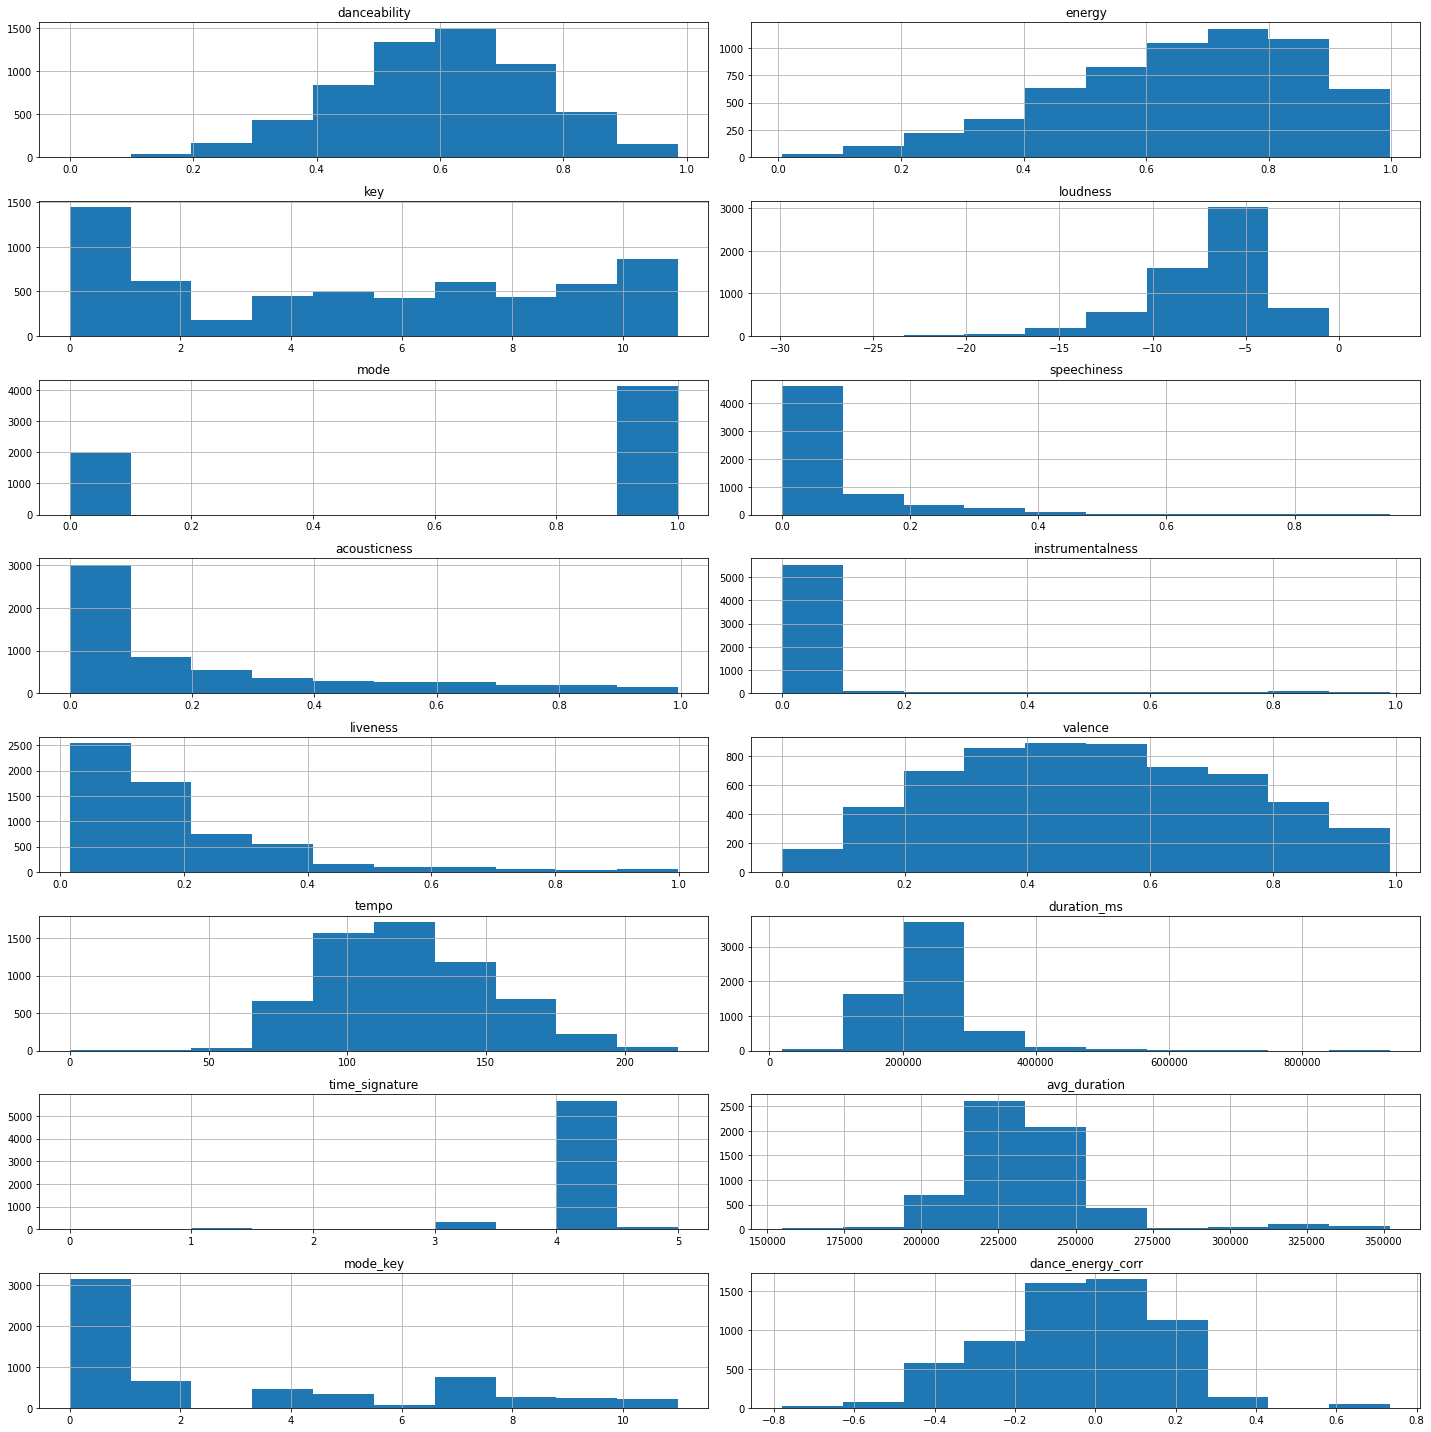

In [62]:
fig, axis = plt.subplots(8,2,figsize=(20, 20))
dat.hist(ax=axis)
fig.tight_layout()